## Задание по уроку 2 недели 4

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [1]:
import numpy as np
import pandas as pd

In [4]:
from sklearn import ensemble, cross_validation, learning_curve, metrics, datasets, tree

In [3]:
digits  = datasets.load_digits(n_class=10)
X = digits.data
y=digits.target

In [39]:
print X.shape, y.shape

(1797L, 64L) (1797L,)


In [7]:
def write_answer(x):
    with open("answer1.txt", "w") as fout:
        fout.write(str(x))

In [8]:
clf = tree.DecisionTreeClassifier()
#clf.fit(X, y)
ans1 = np.mean(cross_validation.cross_val_score(clf, X, y, cv=10))
write_answer(ans1)

In [10]:
bgc = ensemble.BaggingClassifier(base_estimator = clf, n_estimators=100)

In [11]:
ans2 = np.mean(cross_validation.cross_val_score(bgc, X, y, cv=10))
with open("answer2.txt", "w") as fout:
        fout.write(str(ans2))
print ans2

0.924946933225


In [25]:
max_f=int(X.shape[1]**0.5)
bgc2 = ensemble.BaggingClassifier(base_estimator = clf, n_estimators=100, max_features=max_f)
print max_f, X.shape[1]

8 64


In [26]:
ans3 = np.mean(cross_validation.cross_val_score(bgc2, X, y, cv=10))
with open("answer3.txt", "w") as fout:
        fout.write(str(ans3))
print ans3

0.933289873195


In [27]:
clf2 = tree.DecisionTreeClassifier(max_features='sqrt')
bgc4 = ensemble.BaggingClassifier(base_estimator = clf2, n_estimators=100)
ans4 = np.mean(cross_validation.cross_val_score(bgc4, X, y, cv=10))
with open("answer4.txt", "w") as fout:
        fout.write(str(ans4))
print ans4

0.951661861143


In [28]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 100)
ans5 = np.mean(cross_validation.cross_val_score(rf_classifier, X, y, cv=10))
#with open("answer5.txt", "w") as fout:
#        fout.write(str(ans5))
print ans5

0.957780840851


In [34]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(rf_classifier, X, y, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=10, scoring='accuracy')

In [35]:
print train_sizes
print train_scores.mean(axis = 1)
print test_scores.mean(axis = 1)

[ 161  483  806 1128 1450]
[ 1.  1.  1.  1.  1.]
[ 0.78590834  0.88985872  0.92880753  0.93481248  0.94442905]


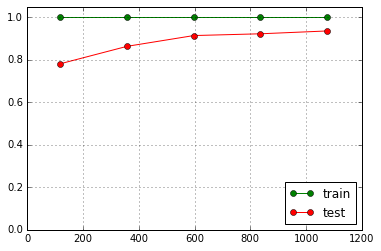

In [33]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [36]:
rf_classifier_m = ensemble.RandomForestClassifier(n_estimators = 50)
print np.mean(cross_validation.cross_val_score(rf_classifier_m, X, y, cv=10))

0.951656232194


In [37]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(rf_classifier_m, X, y, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=10, scoring='accuracy')
print train_sizes
print train_scores.mean(axis = 1)
print test_scores.mean(axis = 1)

[ 161  483  806 1128 1450]
[ 1.  1.  1.  1.  1.]
[ 0.76254128  0.8865382   0.92553922  0.92766618  0.94604738]


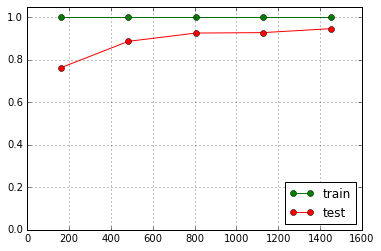

In [38]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

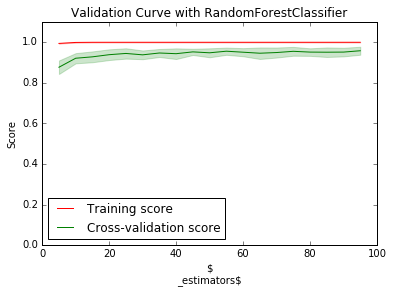

In [46]:

param_range = np.arange(5, 100, 5)
train_scores, test_scores = learning_curve.validation_curve(
    ensemble.RandomForestClassifier(), X, y, param_name="n_estimators", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForestClassifier")
plt.xlabel("$\n_estimators$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

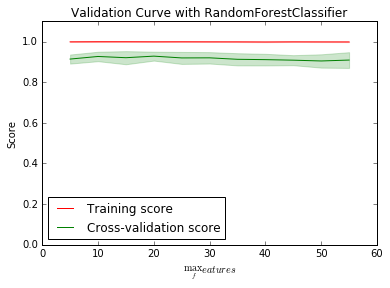

In [45]:
param_range = np.arange(5, 60, 5)
train_scores, test_scores = learning_curve.validation_curve(
    ensemble.RandomForestClassifier(), X, y, param_name="max_features", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForestClassifier")
plt.xlabel("$\max_features$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

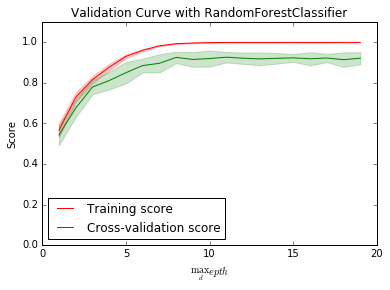

In [49]:
param_range = np.arange(1, 20, 1)
train_scores, test_scores = learning_curve.validation_curve(
    ensemble.RandomForestClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForestClassifier")
plt.xlabel("$\max_depth$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()